In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from fastdtw import fastdtw
from pyts.approximation import DiscreteFourierTransform
from tslearn.clustering import silhouette_score
import pandas as pd
import seaborn as sns

Nota: il clustering si fa solamente sul train set, quindi importo soltando y train e le varie X train approssimate. <br>
Su quello intero non lo provo neanche

In [ ]:
y_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')

In [ ]:
x_train_dft=np.load('X_train_dft.npy')

In [ ]:
x_train_paa=np.load('X_train_paa.npy')
x_train_paa=np.squeeze(x_train_paa)

In [ ]:
x_train_sax=np.load('X_train_sax.npy')
x_train_sax=np.squeeze(x_train_sax)

Ognuno di questi tre sarà provato con il K-means, usando le distanze euclidee e il Dynamic Time Warping. <br>
Andando a calcolare e plottare SEE e Silhouette andiamo a cercare il miglior k -> poi lo runniamo con quel k e proviamo a estrarre quali sono i centroidi, ed eventualmente a visualizzarli.

<h3>SAX</h3>

<h5>Euclidean distances</h5>

In [ ]:
max_k=15
sse_sax_e = []
silhouette_scores_sax_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(x_train_sax)
    sse_sax_e.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_sax_e = kmeans.labels_
    silhouette_e = silhouette_score(x_train_sax, labels_sax_e, metric='euclidean')
    silhouette_scores_sax_e.append(silhouette_e)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
11th fit done
11th append done
12th fit done
12th append done
13th fit done
13th append done
14th fit done
14th append done
15th fit done
15th append done


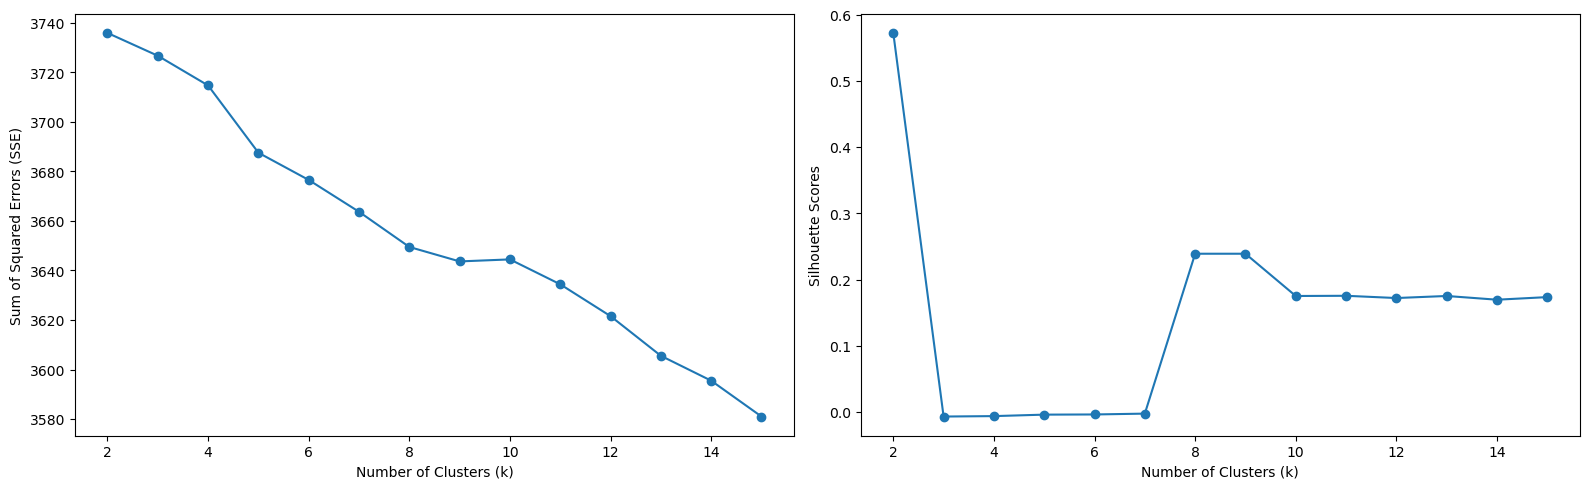

In [ ]:
# Plot SSE and silhouette scores
plt.figure(figsize=(16, 5))
k_values=range(2, max_k + 1)

#SEE
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_sax_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

#Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_sax_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')

plt.tight_layout()
plt.show()

#k=8 clusters sembra essere il miglior trade-off tra SSE e Silhouette

In [ ]:
## Best k = 8
km_sax= TimeSeriesKMeans(n_clusters=8, metric="euclidean",
                      max_iter=5, random_state=42)
km_sax.fit(x_train_sax)
labels_sax_e=km_sax.labels_
c_counts_sax_e= pd.Series(labels_sax_e).value_counts().sort_index()
c_counts_sax_e

0      34
1      35
2      19
3      22
4       1
5       1
6      29
7    1687
dtype: int64

In [ ]:
print('SSE KMeans Euclidean: ', km_sax.inertia_)

labels_sax_e = km_sax.labels_
silhouette_e = silhouette_score(x_train_sax, labels_sax_e, metric='euclidean')
print('Silhouette KMeans Euclidean: ', silhouette_e)

SSE KMeans Euclidean:  3649.5017143023492
Silhouette KMeans Euclidean:  0.2389814529033608


<Figure size 1700x500 with 0 Axes>

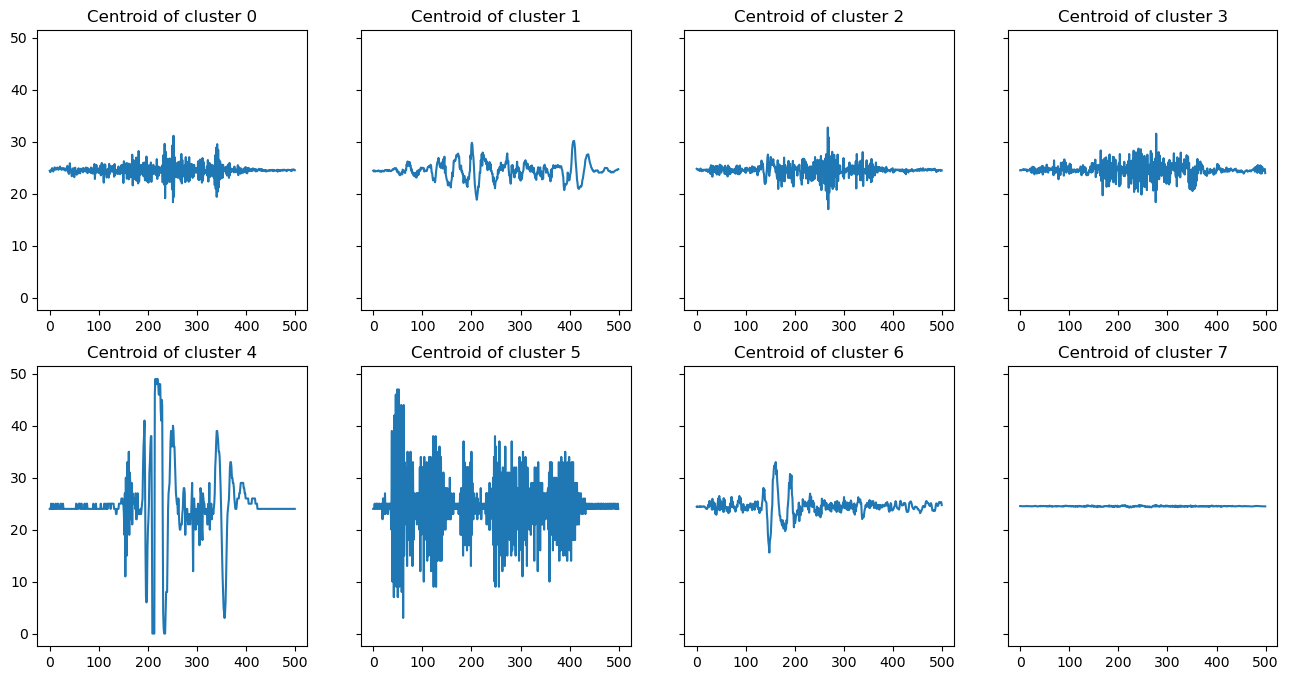

In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(x_train_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(x_train_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1



<h5>DTW</h5>

In [ ]:
#ci mette un botto a runnare, quindi facciamo andare DTW soltanto con 8 cluster, che è la soluzione migliore trovata dalle distanze euclidee
max_k=15
sse_sax_dtw = []
silhouette_scores_sax_dtw = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='dtw')
    kmeans.fit(x_train_sax)
    sse_sax_dtw.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_sax_dtw = kmeans.labels_
    silhouette_dtw = silhouette_score(x_train_sax, labels_sax_dtw, metric='euclidean')
    silhouette_scores_sax_dtw.append(silhouette_dtw)
    print(f'{k}th append done')

KeyboardInterrupt: 

In [ ]:
## Best k = 8
km_sax_dtw= TimeSeriesKMeans(n_clusters=8, metric="dtw",
                      max_iter=5, random_state=42)
km_sax_dtw.fit(x_train_sax)
labels_sax_dtw=km_sax_dtw.labels_
c_counts_sax_dtw= pd.Series(labels_sax_dtw).value_counts().sort_index()
c_counts_sax_dtw

0    432
1     93
2     26
3    290
4     44
5    118
6    748
7     77
dtype: int64

In [ ]:
print('SSE KMeans DTW: ', km_sax_dtw.inertia_)

labels_sax_dtw = km_sax_dtw.labels_
silhouette_dtw = silhouette_score(x_train_sax, labels_sax_dtw, metric='euclidean')
print('Silhouette KMeans DTW: ', silhouette_dtw)

SSE KMeans DTW:  1212.6390792479974
Silhouette KMeans DTW:  -0.04276174251140725


<Figure size 1700x500 with 0 Axes>

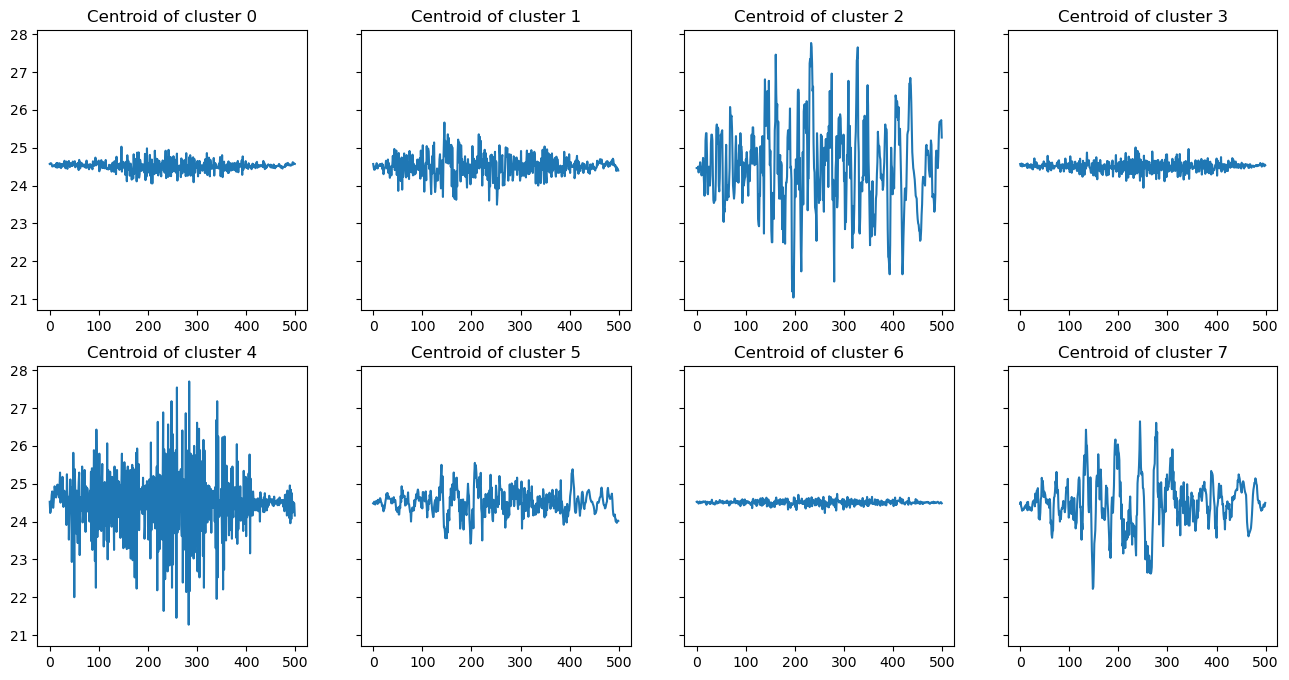

In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(x_train_sax[np.where(km_sax_dtw.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(x_train_sax[np.where(km_sax_dtw.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


<h3>PAA</h3>

<H5>Euclidean</h5>

In [ ]:
max_k=15
sse_paa_e = []
silhouette_scores_paa_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(x_train_paa)
    sse_paa_e.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_paa_e = kmeans.labels_
    silhouette_e = silhouette_score(x_train_paa, labels_paa_e, metric='euclidean')
    silhouette_scores_paa_e.append(silhouette_e)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
11th fit done
11th append done
12th fit done
12th append done
13th fit done
13th append done
14th fit done
14th append done
15th fit done
15th append done


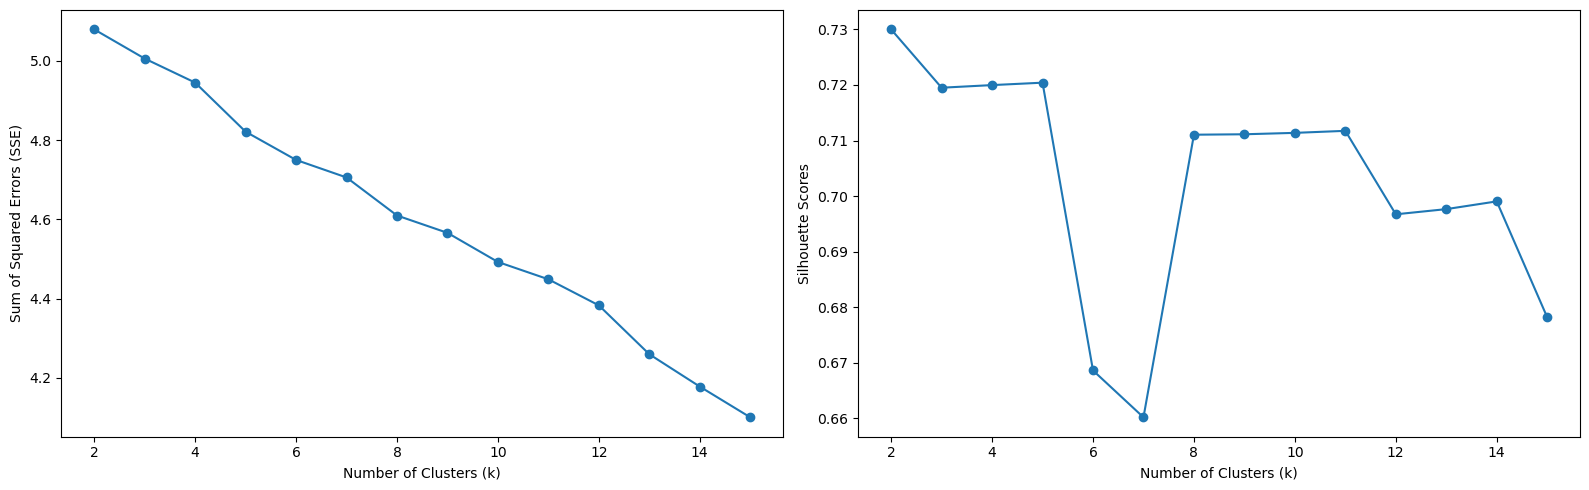

In [ ]:
# Plot SSE and silhouette scores
plt.figure(figsize=(16, 5))
k_values=range(2, max_k + 1)

#SEE
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_paa_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

#Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_paa_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')

plt.tight_layout()
plt.show()

In [ ]:
## Best k = 5
km_paa= TimeSeriesKMeans(n_clusters=5, metric="euclidean",
                      max_iter=5, random_state=42)
km_paa.fit(x_train_paa)
labels_paa_e=km_paa.labels_
c_counts_paa_e= pd.Series(labels_paa_e).value_counts().sort_index()
c_counts_paa_e

#molto problematico perchè le TS vengono messe quasi tutte dentro lo stesso cluster

0    1786
1      36
2       3
3       1
4       2
dtype: int64

In [ ]:
print('SSE KMeans Euclidean PAA: ', km_paa.inertia_)

labels_paa_e = km_paa.labels_
silhouette_paa_e = silhouette_score(x_train_paa, labels_paa_e, metric='euclidean')
print('Silhouette KMeans Euclidean PAA: ', silhouette_paa_e)

SSE KMeans Euclidean PAA:  4.8212176807654
Silhouette KMeans Euclidean PAA:  0.7204166603056619


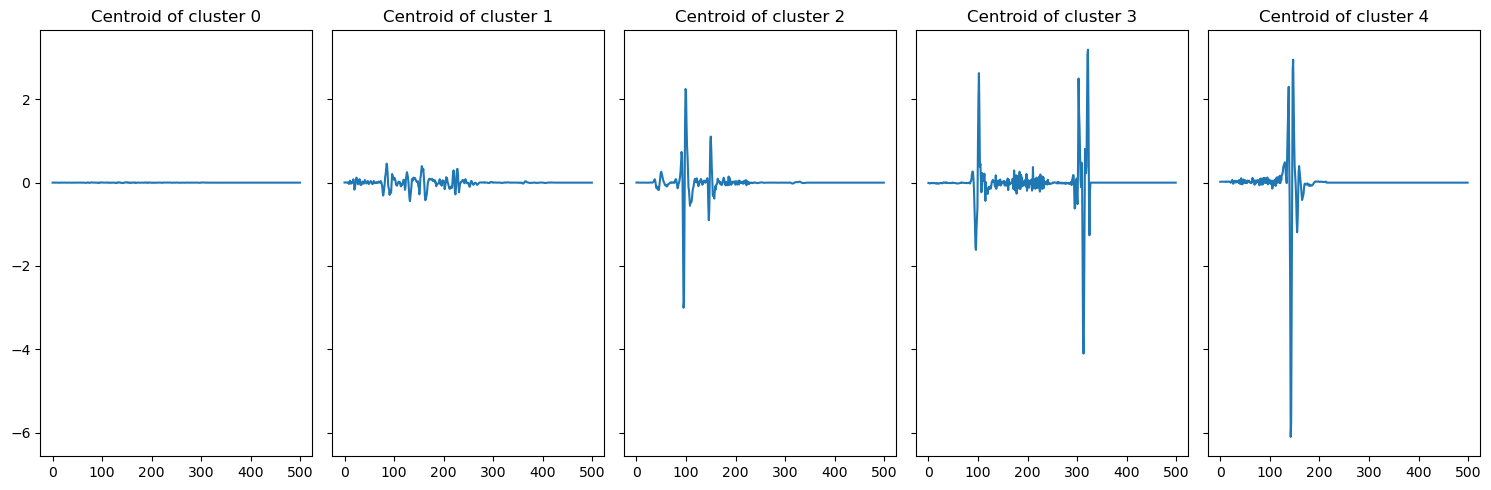

In [ ]:
#plt.figure(figsize=(3,1))
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5),sharey=True)

for i in range(0,5):
    axes[i].plot(np.mean(x_train_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[i].set_title(f'Centroid of cluster {i}')
plt.tight_layout()
plt.show()

#possiamo vedere che il centroide del cluster 0 è praticamente piatto, perchè è la media di quasi tutte le TS


<h5>DTW</h5>

In [ ]:
#ci mette un botto a runnare - calcoliamo soltanto con il numero di cluster come quello euclidean!
max_k=15
sse_paa_dtw = []
silhouette_scores_paa_dtw = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='dtw')
    kmeans.fit(x_train_paa)
    sse_paa_dtw.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_paa_dtw = kmeans.labels_
    silhouette_paa_dtw = silhouette_score(x_train_paa, labels_paa_dtw, metric='euclidean')
    silhouette_scores_paa_dtw.append(silhouette_paa_dtw)
    print(f'{k}th append done')

KeyboardInterrupt: 

In [ ]:
## Best k = 5 (lo stesso numero usato nell'euclidean)
km_paa_dtw= TimeSeriesKMeans(n_clusters=5, metric="dtw",
                      max_iter=5, random_state=42)
km_paa_dtw.fit(x_train_paa)
labels_paa_dtw=km_paa_dtw.labels_
c_counts_paa_dtw= pd.Series(labels_paa_dtw).value_counts().sort_index()
c_counts_paa_dtw

0     554
1      66
2    1135
3      37
4      36
dtype: int64

In [ ]:
print('SSE KMeans DTW PAA: ', km_paa_dtw.inertia_)

labels_paa_dtw = km_paa_dtw.labels_
silhouette_paa_dtw = silhouette_score(x_train_paa, labels_paa_dtw, metric='euclidean')
print('Silhouette KMeans DTW PAA: ', silhouette_paa_dtw)

SSE KMeans DTW PAA:  1.412376605687253
Silhouette KMeans DTW PAA:  0.14921386428493555


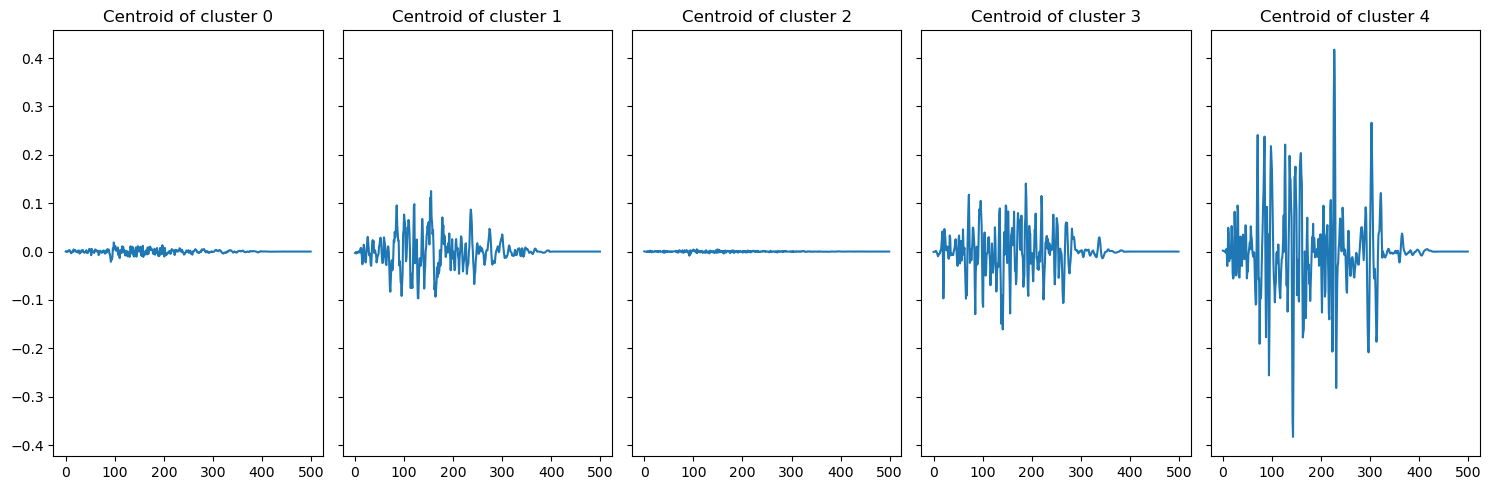

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5),sharey=True)

for i in range(0,5):
    axes[i].plot(np.mean(x_train_paa[np.where(km_paa_dtw.labels_ == i)[0]], axis=0))
    axes[i].set_title(f'Centroid of cluster {i}')
plt.tight_layout()
plt.show()

<h3>DFT</h3>

<h5>Euclidean distances</h5>

In [ ]:
max_k=15
sse_dft_e = []
silhouette_scores_dft_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(x_train_dft)
    sse_dft_e.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_dft_e = kmeans.labels_
    silhouette_dft_e = silhouette_score(x_train_dft, labels_dft_e, metric='euclidean')
    silhouette_scores_dft_e.append(silhouette_dft_e)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
11th fit done
11th append done
12th fit done
12th append done
13th fit done
13th append done
14th fit done
14th append done
15th fit done
15th append done


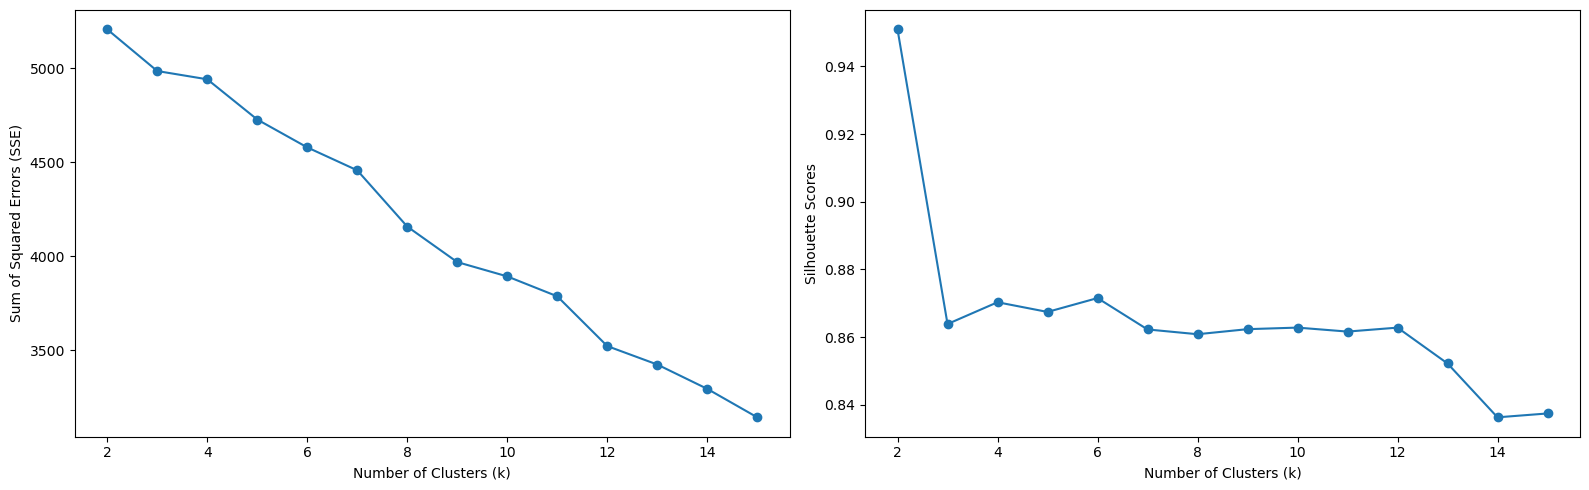

In [ ]:
# Plot SSE and silhouette scores
plt.figure(figsize=(16, 5))
k_values=range(2, max_k + 1)

#SEE
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_dft_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

#Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_dft_e, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')

plt.tight_layout()
plt.show()

In [ ]:
## Best k = 6
km_dft= TimeSeriesKMeans(n_clusters=6, metric="euclidean",
                      max_iter=5, random_state=42)
km_dft.fit(x_train_dft)
labels_dft_e=km_dft.labels_
c_counts_dft_e= pd.Series(labels_dft_e).value_counts().sort_index()
c_counts_dft_e

#anche questo molto problematico, perchè mette quasi tutte nello stesso cluster

0    1810
1       1
2       1
3       5
4      10
5       1
dtype: int64

In [ ]:
print('SSE KMeans Euclidean DFT: ', km_dft.inertia_)

labels_dft_e = km_dft.labels_
silhouette_dft_e = silhouette_score(x_train_dft, labels_dft_e, metric='euclidean')
print('Silhouette KMeans Euclidean DFT: ', silhouette_dft_e)

SSE KMeans Euclidean DFT:  4579.830272125409
Silhouette KMeans Euclidean DFT:  0.8715369296520467


<Figure size 1700x500 with 0 Axes>

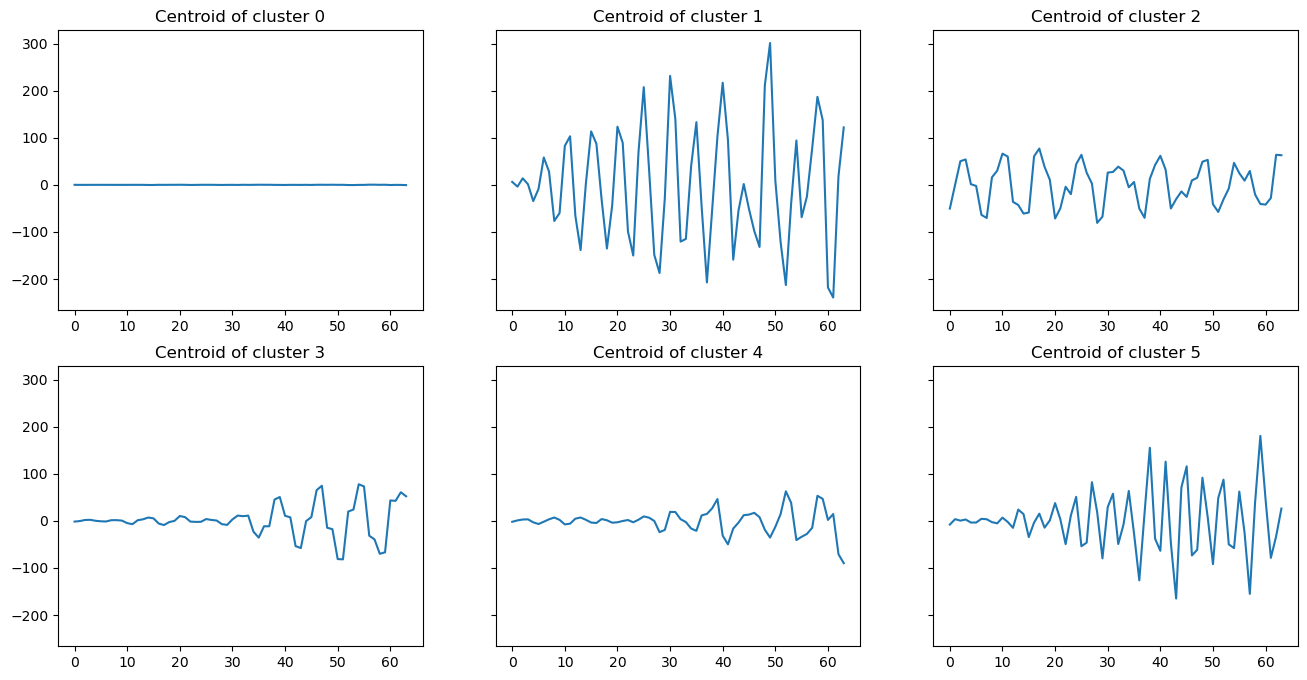

In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(x_train_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,6):
    axes[1,j].plot(np.mean(x_train_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

<h5>DTW</h5>

In [ ]:
max_k=15
sse_dft_dtw = []
silhouette_scores_dft_dtw = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='dtw')
    kmeans.fit(x_train_dft)
    sse_dft_dtw.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')

    # Calculate silhouette coefficient
    labels_dft_dtw = kmeans.labels_
    silhouette_dft_dtw = silhouette_score(x_train_dft, labels_dft_dtw, metric='euclidean')
    silhouette_scores_dft_dtw.append(silhouette_dft_dtw)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done
11th fit done
11th append done
12th fit done
12th append done
13th fit done
13th append done
14th fit done
14th append done
15th fit done
15th append done


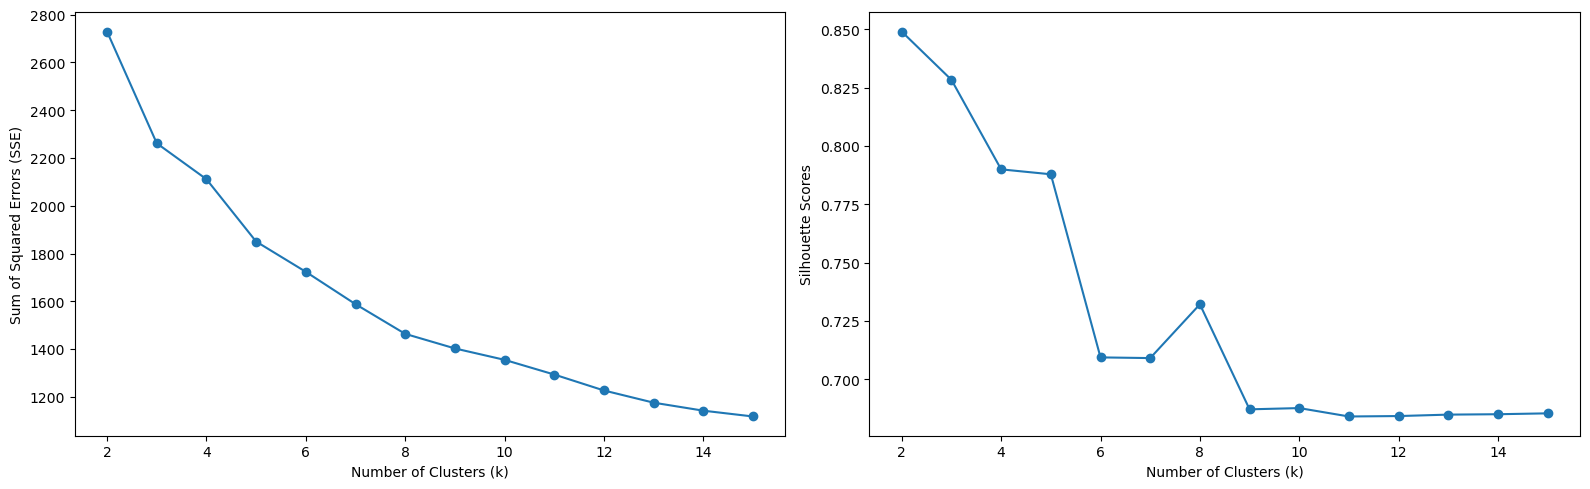

In [ ]:
# Plot SSE and silhouette scores
plt.figure(figsize=(16, 5))
k_values=range(2, max_k + 1)

#SEE
plt.subplot(1, 2, 1)
plt.plot(k_values, sse_dft_dtw, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

#Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_dft_dtw, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')

plt.tight_layout()
plt.show()

In [ ]:
#Anche se ci mette abbastanza a runnare, con un training set della grandezza ridotta come quello del DFT è possibile trovare il miglior k direttamente anche per il DTW.
#Miglior k= 8
km_dft_dtw= TimeSeriesKMeans(n_clusters=8, metric="dtw",
                      max_iter=5, random_state=42)
km_dft_dtw.fit(x_train_dft)
labels_dft_dtw=km_dft_dtw.labels_
c_counts_dft_dtw= pd.Series(labels_dft_dtw).value_counts().sort_index()
c_counts_dft_dtw

0    1568
1      12
2     160
3       1
4       4
5      66
6       8
7       9
dtype: int64

In [ ]:
print('SSE KMeans DTW DFT: ', km_dft_dtw.inertia_)

labels_dft_dtw = km_dft_dtw.labels_
silhouette_dft_dtw = silhouette_score(x_train_dft, labels_dft_dtw, metric='euclidean')
print('Silhouette KMeans DTW DFT: ', silhouette_dft_dtw)

SSE KMeans DTW DFT:  1464.2187949713398
Silhouette KMeans DTW DFT:  0.7321423940250475


<Figure size 1700x500 with 0 Axes>

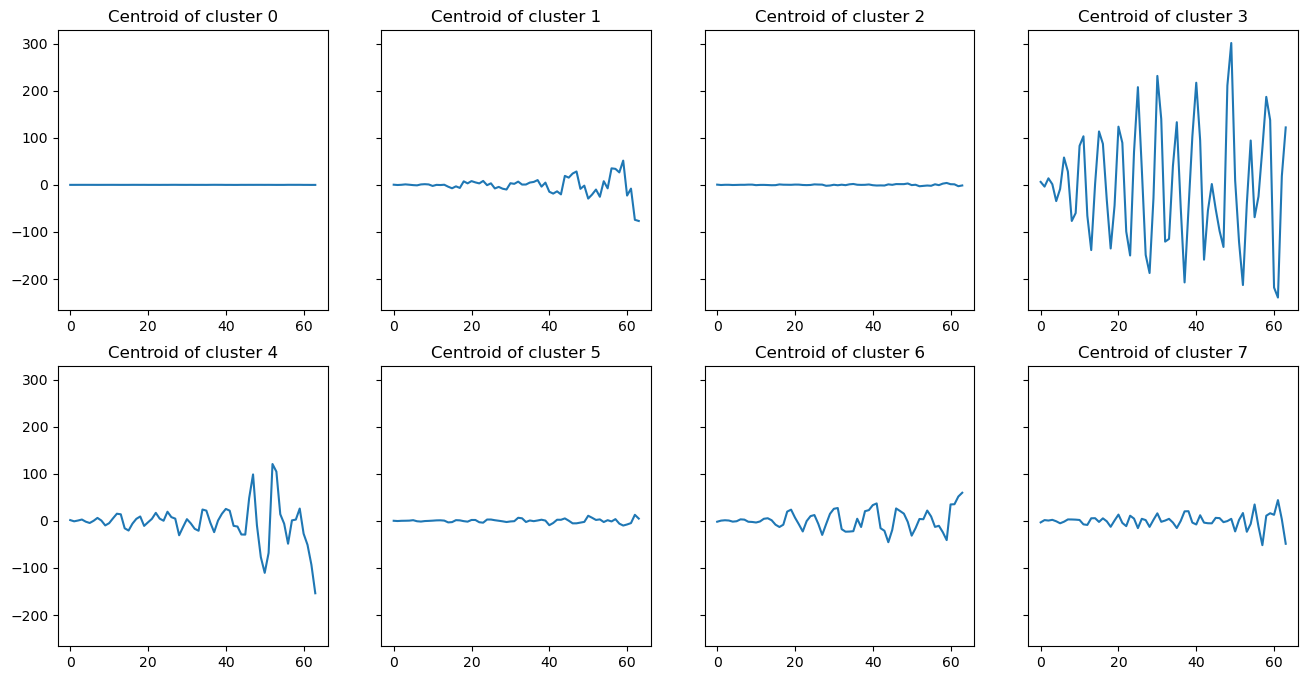

In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(x_train_dft[np.where(km_dft_dtw.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(x_train_dft[np.where(km_dft_dtw.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

<h5>COME MIGLIORE E QUINDI DA RAPPRESENTARE PRENDIAMO SAX CON DTW, che anche se non ha i migliori valori di SSE e Silhouette è una buona via di mezzo perchè divide bene i cluster come numero appartenente ad ognuno, facendo così in modo di ottenere dei centroidi significativi</h5>

In [ ]:

def inverse_dft(time_series, initial_length):
    # Pad the time series with zeros if needed
    if len(time_series) < initial_length:
        padded_time_series = np.pad(time_series, (0, initial_length - len(time_series)), 'constant')
    else:
        padded_time_series = time_series

    # Apply inverse DFT
    inverse_transform = np.fft.ifft(padded_time_series)

    # Return the real part of the inverse transform
    return np.real(inverse_transform)

In [ ]:
# Get the centroids - gets the nearest TS given the data and the centroids
def getNearestTS(data, centroids):
    centroids = np.squeeze(centroids)

    # Function to calculate DTW distance between two time series
    def dtw_distance(ts1, ts2):
        distance, _ = fastdtw(ts1, ts2)
        return distance

    # Calculate the distance between each centroid and all time series data points
    distances = cdist(centroids, data, metric=dtw_distance)

    # Find the nearest time series for each centroid
    nearest_indices = np.argmin(distances, axis=1)

    # Retrieve the nearest time series for each centroid
    #nearest_time_series = [x_train_dft[i] for i in nearest_indices]

    # Print the results
    for i, centroid in enumerate(centroids):
        print (f"Centroid {i}: Nearest Time Series Index = {nearest_indices[i]}")

In [ ]:
#Ri-alleno qui sotto il modello migliore, in modo da averlo direttamente qui
#Sax con DTW, e allenandolo con 8 cluster
km_sax_dtw= TimeSeriesKMeans(n_clusters=8, metric="dtw",
                      max_iter=5, random_state=42)
km_sax_dtw.fit(x_train_sax)
labels_sax_dtw=km_sax_dtw.labels_
c_counts_sax_dtw= pd.Series(labels_sax_dtw).value_counts().sort_index()
c_counts_sax_dtw

KeyboardInterrupt: 

In [ ]:
print('SSE KMeans SAX DTW: ', km_sax_dtw.inertia_)

labels_sax_dtw = km_sax_dtw.labels_
silhouette_dtw = silhouette_score(x_train_sax, labels_sax_dtw, metric='euclidean')
print('Silhouette KMeans SAX DTW: ', silhouette_dtw)

SSE KMeans SAX DTW:  1212.6390792479974
Silhouette KMeans SAX DTW:  -0.04276174251140725


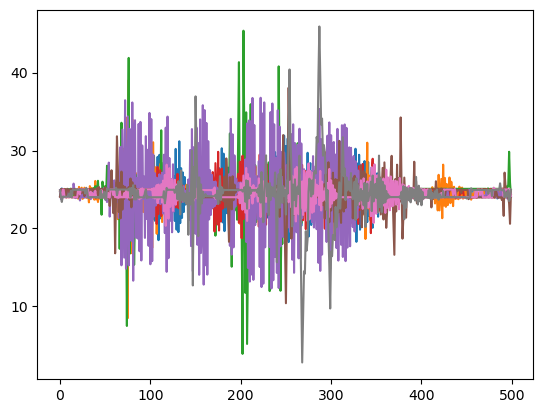

In [ ]:
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_).T)
plt.show()

In [ ]:
km_sax_dtw.cluster_centers_.shape

(8, 500, 1)

In [ ]:
#Ottengo quali sono le TS più vicine ai centroidi dei cluster individuati. Su queste poi saranno individuati motifs and discords
print(getNearestTS(x_train_sax, km_sax_dtw.cluster_centers_))

Centroid 0: Nearest Time Series Index = 455
Centroid 1: Nearest Time Series Index = 341
Centroid 2: Nearest Time Series Index = 787
Centroid 3: Nearest Time Series Index = 527
Centroid 4: Nearest Time Series Index = 989
Centroid 5: Nearest Time Series Index = 561
Centroid 6: Nearest Time Series Index = 811
Centroid 7: Nearest Time Series Index = 785
None


In [ ]:
centroids=km_sax_dtw.cluster_centers_

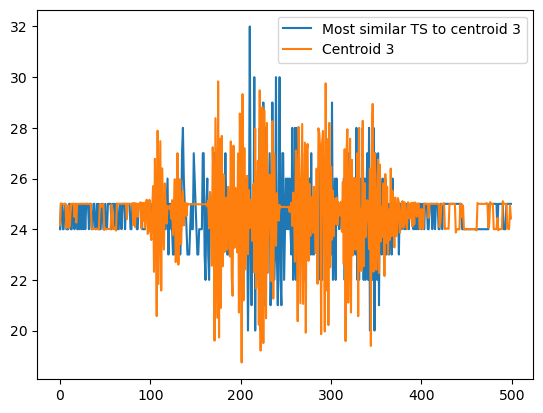

In [ ]:
plt.plot(x_train_sax[527], label='Most similar TS to centroid 3')
plt.plot(centroids[3], label='Centroid 3')
plt.legend()

In [ ]:
#faccio con k=5
km_dft_dtw= TimeSeriesKMeans(n_clusters=5, metric="dtw",
                      max_iter=5, random_state=42)
km_dft_dtw.fit(x_train_dft)
labels_dft_dtw=km_dft_dtw.labels_
c_counts_dft_dtw= pd.Series(labels_dft_dtw).value_counts().sort_index()
c_counts_dft_dtw

0    1654
1      13
2      47
3     113
4       1
dtype: int64

In [ ]:
print('SSE KMeans DTW DFT: ', km_dft_dtw.inertia_)

labels_dft_dtw = km_dft_dtw.labels_
silhouette_dft_dtw = silhouette_score(x_train_dft, labels_dft_dtw, metric='euclidean')
print('Silhouette KMeans DTW DFT: ', silhouette_dft_dtw)

SSE KMeans DTW DFT:  1850.5348729316586
Silhouette KMeans DTW DFT:  0.787862245238659


In [ ]:
print(getNearestTS(x_train_dft, km_dft_dtw.cluster_centers_))
#- queste sono quelle da usare per motifs/discords!!

Centroid 0: Nearest Time Series Index = 1784
Centroid 1: Nearest Time Series Index = 761
Centroid 2: Nearest Time Series Index = 308
Centroid 3: Nearest Time Series Index = 1179
Centroid 4: Nearest Time Series Index = 1704
None


<h3>DIMENSIONALITY REDUCTION</h3>

Usare almeno due tecniche di dimensionality reduction per visualizzare i cluster. <br>
Analizzare i cluster per vedere somiglianze/ discordanze. -> Potrei provare a far vedere la composizione M/F o speech/song o Emotion, visto che sono 8 emozioni

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_train_sax_tsne = tsne.fit_transform(x_train_sax)
X_train_sax_tsne.shape

/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1828, 2)

In [ ]:
unique_labels = list(set(labels_sax_dtw))
unique_labels

[0, 1, 2, 3, 4, 5, 6, 7]

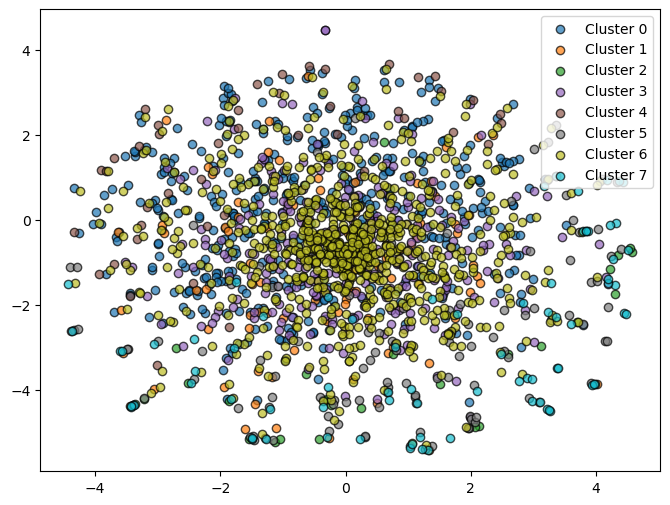

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('tab10', len(set(labels_sax_dtw)))
for cluster_label in set(labels_sax_dtw):
    mask = (labels_sax_dtw == cluster_label)
    plt.scatter(X_train_sax_tsne[mask, 0], X_train_sax_tsne[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(x_train_sax)
X_train_sax_pca = pca.transform(x_train_sax)
X_train_sax_pca.shape

(1828, 2)

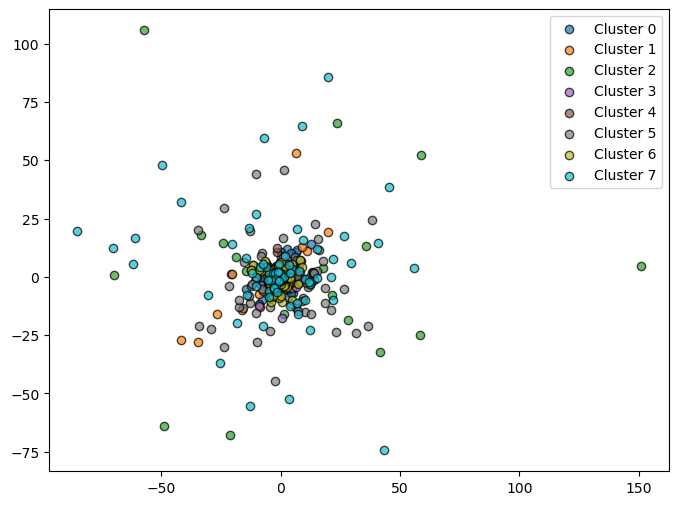

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('tab10', len(set(labels_sax_dtw)))
for cluster_label in set(labels_sax_dtw):
    mask = (labels_sax_dtw == cluster_label)
    plt.scatter(X_train_sax_pca[mask, 0], X_train_sax_pca[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_sax_iso = iso.fit_transform(x_train_sax)
X_train_sax_iso.shape

(1828, 2)

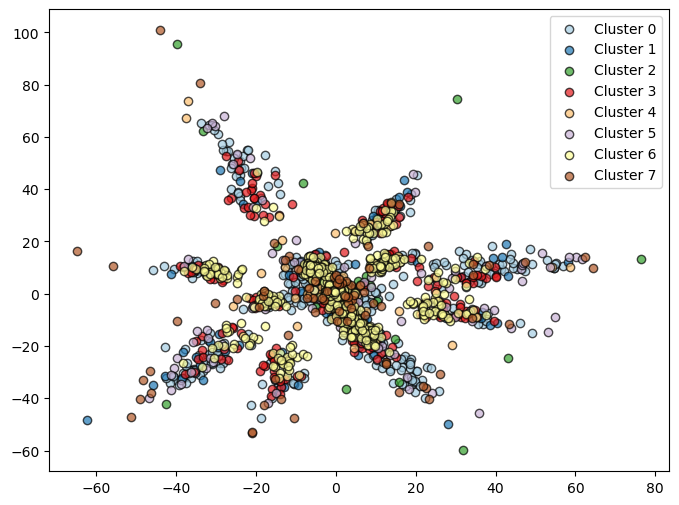

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('Paired', len(set(labels_sax_dtw)))
for cluster_label in set(labels_sax_dtw):
    mask = (labels_sax_dtw == cluster_label)
    plt.scatter(X_train_sax_iso[mask, 0], X_train_sax_iso[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()

<h3>ANALYSIS OF THE CLUSTERS</h3>

Provo ad analizzare i cluster, la loro composizione rispetto a emozioni, speech/song e M/F

In [ ]:
y_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')

In [ ]:
y_train['Cluster_Labels'] = labels_sax_dtw

In [ ]:
y_train

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,Cluster_Labels
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,4
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,4
2,audio-only,speech,neutral,normal,Viva il che,1st,1,M,03-01-01-01-02-01-01.wav,0
3,audio-only,speech,neutral,normal,Viva il che,2nd,1,M,03-01-01-01-02-02-01.wav,4
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,0
...,...,...,...,...,...,...,...,...,...,...
1823,audio-only,speech,surprised,normal,Viva il che,2nd,18,F,03-01-08-01-02-02-18.wav,0
1824,audio-only,speech,surprised,strong,Kids are talking by the door,1st,18,F,03-01-08-02-01-01-18.wav,0
1825,audio-only,speech,surprised,strong,Kids are talking by the door,2nd,18,F,03-01-08-02-01-02-18.wav,3
1826,audio-only,speech,surprised,strong,Viva il che,1st,18,F,03-01-08-02-02-01-18.wav,0


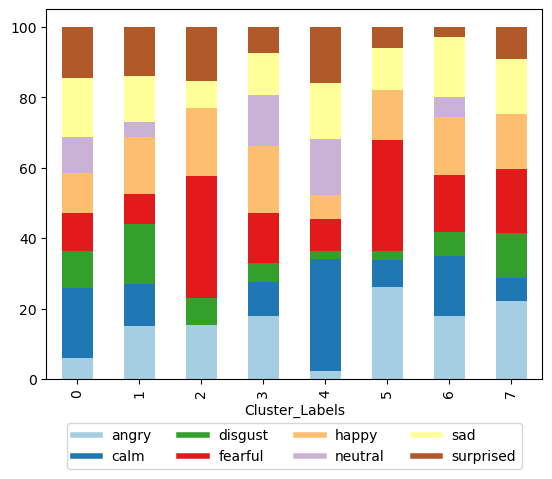

In [ ]:
grouped_data = y_train.groupby(['Cluster_Labels', 'emotion']).size()
cluster_totals = grouped_data.groupby('Cluster_Labels').sum()
percentages = grouped_data.div(cluster_totals, level='Cluster_Labels') * 100
pivot_df = percentages.reset_index().pivot(index='Cluster_Labels', columns='emotion', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df.columns))
ax = pivot_df.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df.columns))])
legend_labels = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df.columns)]
ax.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=4)


#ax = pivot_df.plot(kind='bar', stacked=True)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#          fancybox=True, shadow=False, ncol=4)

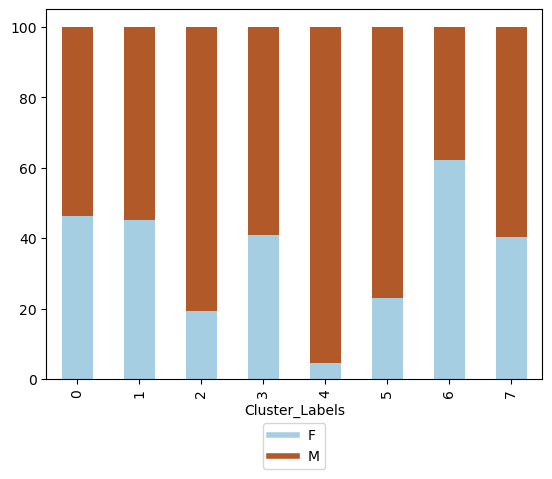

In [ ]:
grouped_data_sex = y_train.groupby(['Cluster_Labels', 'sex']).size()
cluster_totals_sex = grouped_data_sex.groupby('Cluster_Labels').sum()
percentages_sex = grouped_data_sex.div(cluster_totals_sex, level='Cluster_Labels') * 100
pivot_df_sex = percentages_sex.reset_index().pivot(index='Cluster_Labels', columns='sex', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df_sex.columns))
ax_sex = pivot_df_sex.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df_sex.columns))])
legend_labels_sex = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df_sex.columns)]
ax_sex.legend(handles=legend_labels_sex, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False)

plt.show()

#ax_sex = pivot_df_sex.plot(kind='bar', stacked=True)
#ax_sex.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#          fancybox=True, shadow=False)

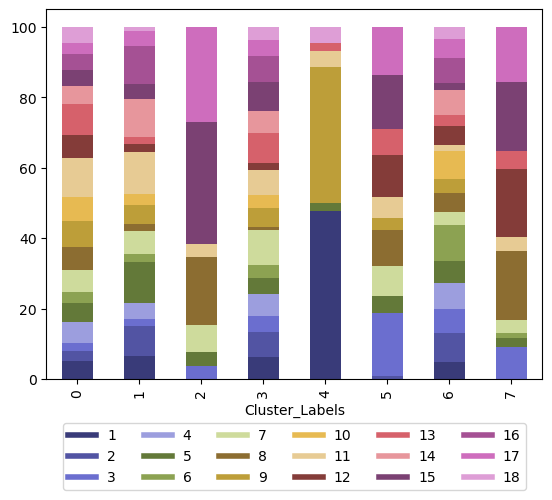

In [ ]:
#gli actor sono troppi, non vengono cose comprensibili

grouped_data_actor = y_train.groupby(['Cluster_Labels', 'actor']).size()
cluster_totals_actor = grouped_data_actor.groupby('Cluster_Labels').sum()
percentages_actor = grouped_data_actor.div(cluster_totals_actor, level='Cluster_Labels') * 100
pivot_df_actor = percentages_actor.reset_index().pivot(index='Cluster_Labels', columns='actor', values=0)

cmap = plt.cm.get_cmap('tab20b', len(pivot_df_actor.columns))
ax_actor = pivot_df_actor.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df_actor.columns))])
legend_labels_actor = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df_actor.columns)]
ax_actor.legend(handles=legend_labels_actor, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=6)

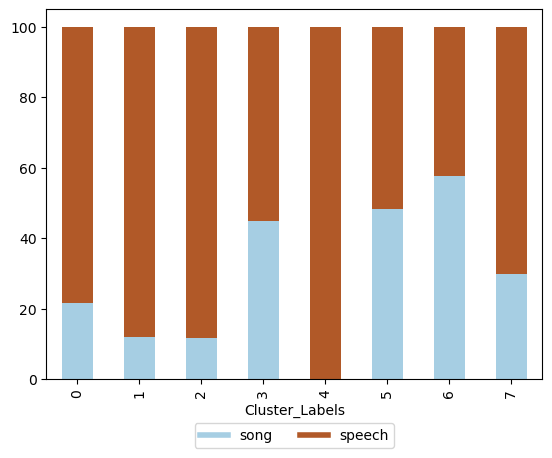

In [ ]:
grouped_data_vc = y_train.groupby(['Cluster_Labels', 'vocal_channel']).size()
cluster_totals_vc = grouped_data_vc.groupby('Cluster_Labels').sum()
percentages_vc = grouped_data_vc.div(cluster_totals_vc, level='Cluster_Labels') * 100
pivot_df_vc = percentages_vc.reset_index().pivot(index='Cluster_Labels', columns='vocal_channel', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df_vc.columns))
ax_vc = pivot_df_vc.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df_vc.columns))])
legend_labels_vc = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df_vc.columns)]
ax_vc.legend(handles=legend_labels_vc, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=2)


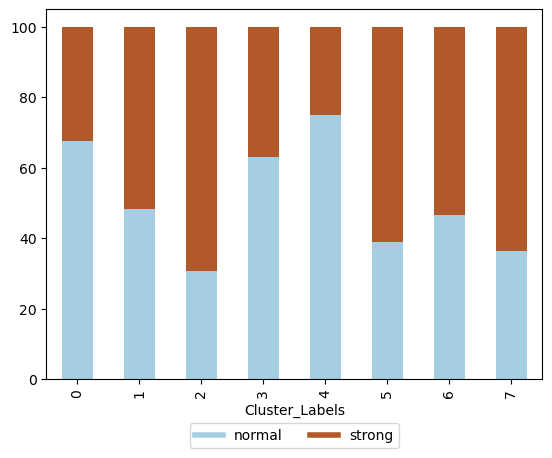

In [ ]:
grouped_data_ei = y_train.groupby(['Cluster_Labels', 'emotional_intensity']).size()
cluster_totals_ei = grouped_data_ei.groupby('Cluster_Labels').sum()
percentages_ei = grouped_data_ei.div(cluster_totals_ei, level='Cluster_Labels') * 100
pivot_df_ei = percentages_ei.reset_index().pivot(index='Cluster_Labels', columns='emotional_intensity', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df_ei.columns))
ax_ei = pivot_df_ei.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df_ei.columns))])
legend_labels_ei = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df_ei.columns)]
ax_ei.legend(handles=legend_labels_ei, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=2)